In [1]:
%matplotlib inline

import matplotlib.pylab as plt 

# routlines for analyzing odes
import sys
import pickle as pk
import numpy as np
sys.path.append('/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/pkh-code/fitting')
import analyzeGotran as ao


In [8]:
data0 = ao.readPickle("/home/AD/bch265/Data_storage/8min_MG_1mMATP_cat.pickle")
data1 = ao.readPickle("/home/AD/bch265/Data_storage/8min_MG_0.1mMATP_cat.pickle")
data2 = ao.readPickle("/home/AD/bch265/Data_storage/8min_MG_0.01mMATP_cat.pickle")
data3 = ao.readPickle("/home/AD/bch265/Data_storage/noptx_CaMCN_valid_cat.pickle")
data4 = ao.readPickle("/home/AD/bch265/Data_storage/noptx_CaMCN_valid2_cat.pickle")

Reading /home/AD/bch265/Data_storage/8min_MG_1mMATP_cat.pickle
Reading /home/AD/bch265/Data_storage/8min_MG_0.1mMATP_cat.pickle
Reading /home/AD/bch265/Data_storage/8min_MG_0.01mMATP_cat.pickle
Reading /home/AD/bch265/Data_storage/noptx_CaMCN_valid_cat.pickle
Reading /home/AD/bch265/Data_storage/noptx_CaMCN_valid2_cat.pickle


In [9]:
data0.keys()
data1.keys()
data2.keys()
data3.keys()
data4.keys()

['s_idx', 'p_idx', 'j', 'p', 's', 'j_idx', 't']

In [10]:
ly1 = np.array([0,0,27.10982659,36.41618497,17.80346821,-1.61849711,-6.473988439])
ly2 = np.array([0,-0.4046242775,46.93641618,35.60693642,35.20231214,39.65317919,39.65317919,17.39884393,10.92485549,7.283236994,4.450867052,3.641618497])
ly3 = np.array([0,0,52.60115607,26.70520231,27.10982659,25.89595376,21.44508671,19.01734104,16.99421965,16.99421965,16.1849711])

lt1 = np.array([0,1.185185185,1.259259259,1.703703704,2.296296296,3.407407407,7.62962963])
lt2 = np.array([0,1.185185185,1.333333333,1.481481481,1.555555556,1.851851852,2.148148148,3.555555556,4.148148148,4.962962963,6.222222222,7.481481481])
lt3 = np.array([0,1.407407407,1.555555556,1.777777778,2.074074074,2.37037037,2.740740741,2.962962963,3.925925926,6.592592593,7.703703704])

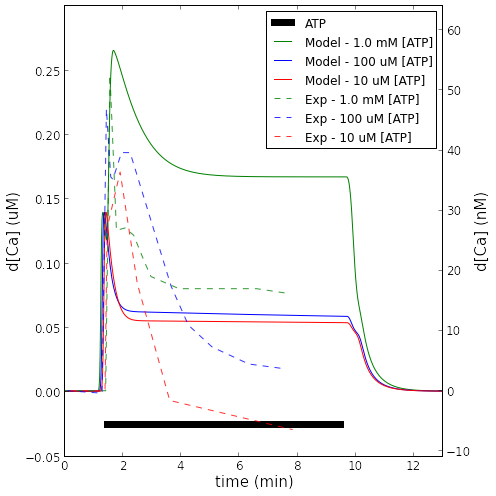

In [10]:
stateLabel = "Cai"
subData0 = ao.GetData(data0,stateLabel)
subData1 = ao.GetData(data1,stateLabel)
subData2 = ao.GetData(data2,stateLabel)
# data is stored as
# subData.t - time
# subData.valsIdx - values of 'stateLabel' state

Cai0 = subData0.valsIdx
Cai1 = subData1.valsIdx
Cai2 = subData2.valsIdx
min0 = min(Cai0)
min1 = min(Cai1)
min2 = min(Cai2)
plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
ax2 = ax.twinx()
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

ln1 = ax.plot((subData0.t*1000-3300)/60,(subData0.valsIdx-min0),'g-',label="Model - 1.0 mM [ATP]")
ln2 = ax.plot((subData0.t*1000-3300)/60,(subData1.valsIdx-min1),'b-',label="Model - 100 uM [ATP]")
ln3 = ax.plot((subData0.t*1000-3300)/60,(subData2.valsIdx-min2),'r-',label="Model - 10 uM [ATP]")

ln4 = ax2.plot(lt3+0.0,ly3,'g--',alpha=0.8,label="Exp - 1.0 mM [ATP]")
ln5 = ax2.plot(lt2+0.1,ly2,'b--',alpha=0.8,label="Exp - 100 uM [ATP]")
ln6 = ax2.plot(lt1+0.2,ly1,'r--',alpha=0.8,label="Exp - 10 uM [ATP]") 

ln7 = ax.plot([1.5,9.5],[-0.025,-0.025],'k',label='ATP',linewidth=7)

ax.set_xlabel("time (min)",fontsize=15)
ax.set_ylabel("d[Ca] (uM)",fontsize=15)
ax2.set_ylabel("d[Ca] (nM)",fontsize=15)
ax.set_xlim(0/60,800/60)
ax.set_ylim(-0.05,0.3)
ax2.set_ylim(-11,64)

lns = ln7 + ln1 + ln2 + ln3 + ln4 + ln5 + ln6
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0,fontsize=12)

plt.tight_layout()
plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/casighidenew.png")


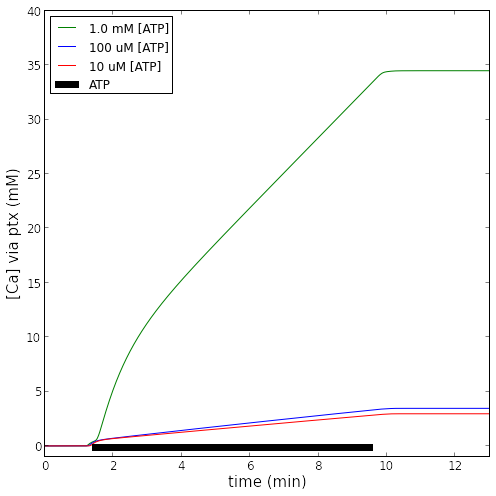

In [13]:
stateLabel = "Captx"
subData1 = ao.GetData(data0,stateLabel)
subData2 = ao.GetData(data1,stateLabel)
subData3 = ao.GetData(data2,stateLabel)
min1 = min(subData1.valsIdx[3300:4000])
min2 = min(subData2.valsIdx[3300:4000])
min3 = min(subData3.valsIdx[3300:4000])

plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
plt.plot((subData1.t*1000-3300)/60,(subData1.valsIdx-min1)/1000,'g-',label="1.0 mM [ATP]")
plt.plot((subData2.t*1000-3300)/60,(subData2.valsIdx-min2)/1000,'b-',label="100 uM [ATP]")
plt.plot((subData3.t*1000-3300)/60,(subData3.valsIdx-min3)/1000,'r-',label="10 uM [ATP]")
plt.plot([1.5,9.5],[-0.2,-0.2],'k',label='ATP',linewidth=7)
#plt.plot(subData5.t*1000,subData5.valsIdx,'m-',label="3")
#plt.plot(subData6.t*1000,subData6.valsIdx,'c-',label="5")
plt.xlim(0/60,800/60)
plt.ylim(-1,40)
plt.legend(loc=2,fontsize=12)
plt.xlabel("time (min)",fontsize=15)
plt.ylabel("[Ca] via P2X (mM)",fontsize=15)
plt.tight_layout()
plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/Captx8minnew.png")

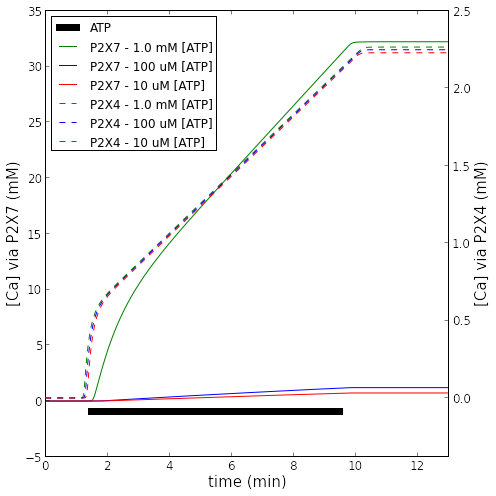

In [27]:
stateLabel1 = "Captxs"
subData11 = ao.GetData(data0,stateLabel1)
subData12 = ao.GetData(data1,stateLabel1)
subData13 = ao.GetData(data2,stateLabel1)

stateLabel2 = "Captxf"
subData21 = ao.GetData(data0,stateLabel2)
subData22 = ao.GetData(data1,stateLabel2)
subData23 = ao.GetData(data2,stateLabel2)

min11 = min(subData11.valsIdx[3300:4000])
min12 = min(subData12.valsIdx[3300:4000])
min13 = min(subData13.valsIdx[3300:4000])

min21 = min(subData21.valsIdx[3300:4000])
min22 = min(subData22.valsIdx[3300:4000])
min23 = min(subData23.valsIdx[3300:4000])

plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
ax2 = ax.twinx()
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

ln1= ax.plot((subData11.t*1000-3300)/60,(subData11.valsIdx-min11)/1000,'g-',label="P2X7 - 1.0 mM [ATP]")
ln2= ax.plot((subData12.t*1000-3300)/60,(subData12.valsIdx-min12)/1000,'b-',label="P2X7 - 100 uM [ATP]")
ln3= ax.plot((subData13.t*1000-3300)/60,(subData13.valsIdx-min13)/1000,'r-',label="P2X7 - 10 uM [ATP]")

ln4= ax2.plot((subData21.t*1000-3300)/60,(subData21.valsIdx-min21)/1000,'g--',label="P2X4 - 1.0 mM [ATP]")
ln5= ax2.plot((subData22.t*1000-3300)/60,(subData22.valsIdx-min22)/1000,'b--',label="P2X4 - 100 uM [ATP]")
ln6= ax2.plot((subData23.t*1000-3300)/60,(subData23.valsIdx-min23)/1000,'r--',label="P2X4 - 10 uM [ATP]")

ln7= ax.plot([1.5,9.5],[-1,-1],'k',label='ATP',linewidth=7)

lns = ln7 + ln1 + ln2 + ln3 + ln4 + ln5 + ln6
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0,fontsize=12)

ax.set_xlim(0/60,800/60)
ax.set_ylim(-5,35)
ax2.set_ylim(-0.38,2.5)

ax.set_xlabel("time (min)",fontsize=15)
ax.set_ylabel("[Ca] via P2X7 (mM)",fontsize=15)
ax2.set_ylabel("[Ca] via P2X4 (mM)",fontsize=15)
plt.tight_layout()
plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/Captxsvsptxf8minnew.png")

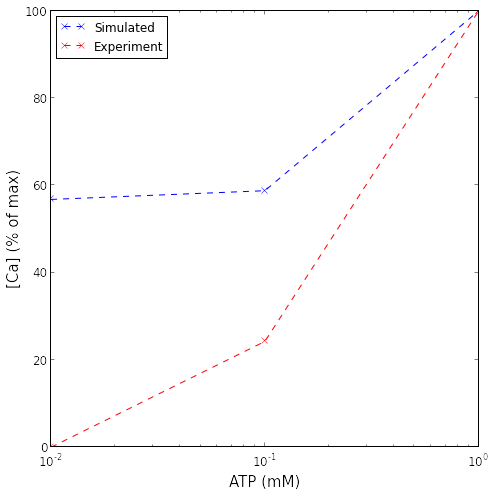

In [16]:
stateLabel = "Cai"
subData0 = ao.GetData(data0,stateLabel)
subData1 = ao.GetData(data1,stateLabel)
subData2 = ao.GetData(data2,stateLabel)


Cai0 = subData0.valsIdx[3800:4100]
Cai1 = subData1.valsIdx[3800:4100]
Cai2 = subData2.valsIdx[3800:4100]
max0 = max(Cai0)
max1 = max(Cai1)
max2 = max(Cai2)

mod = np.array([max2/max0,max1/max0,max0/max0])*100
lit = np.array([0,4,16.5])*100/16.5
atp = np.array([0.01,0.1,1])

plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.semilogx(atp,mod,'b--x',label="Simulated")
plt.semilogx(atp,lit,'r--x',label="Experiment")
plt.legend(loc=0,fontsize=12)
plt.xlabel("ATP (mM)",fontsize=15)
plt.ylabel("[Ca] (% of max)",fontsize=15)
plt.tight_layout()
plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/casighide2.png")

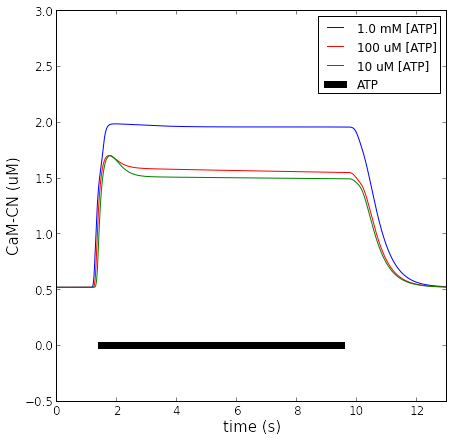

In [18]:
stateLabel = "CaMCN"
subData1 = ao.GetData(data0,stateLabel)
subData2 = ao.GetData(data1,stateLabel)
subData3 = ao.GetData(data2,stateLabel)


plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
plt.plot((subData1.t*1000-3300)/60,subData1.valsIdx,'b-',label="1.0 mM [ATP]")
plt.plot((subData2.t*1000-3300)/60,subData2.valsIdx,'r-',label="100 uM [ATP]")
plt.plot((subData3.t*1000-3300)/60,subData3.valsIdx,'g-',label="10 uM [ATP]")
plt.plot([1.5,9.5],[0.0,0.0],'k',label='ATP',linewidth=7)
#plt.plot(subData5.t*1000,subData5.valsIdx,'m-',label="3")
#plt.plot(subData6.t*1000,subData6.valsIdx,'c-',label="5")
plt.xlim(0/60,800/60)
plt.ylim(-0.5,3)
plt.legend(fontsize=12)
plt.xlabel("time (s)",fontsize=15)
plt.ylabel("CaM-CN (uM)",fontsize=15)
plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/CaMCN8minnew.png")

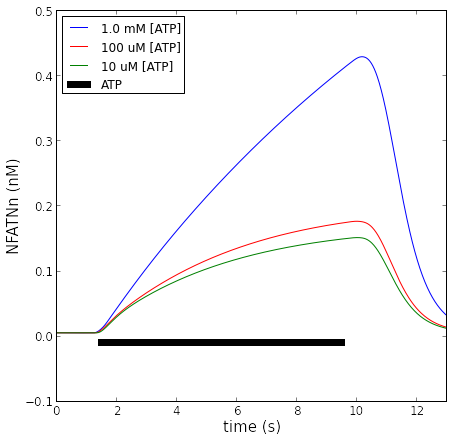

In [20]:
stateLabel = "NFATNn"
subData1 = ao.GetData(data0,stateLabel)
subData2 = ao.GetData(data1,stateLabel)
subData3 = ao.GetData(data2,stateLabel)


plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
plt.plot((subData1.t*1000-3300)/60,subData1.valsIdx,'b-',label="1.0 mM [ATP]")
plt.plot((subData2.t*1000-3300)/60,subData2.valsIdx,'r-',label="100 uM [ATP]")
plt.plot((subData3.t*1000-3300)/60,subData3.valsIdx,'g-',label="10 uM [ATP]")
plt.plot([1.5,9.5],[-0.01,-0.01],'k',label='ATP',linewidth=7)
#plt.plot(subData5.t*1000,subData5.valsIdx,'m-',label="3")
#plt.plot(subData6.t*1000,subData6.valsIdx,'c-',label="5")
plt.xlim(0/60,800/60)
#plt.ylim(0.9,1.1)
plt.legend(loc=0,fontsize=12)
plt.xlabel("time (s)",fontsize=15)
plt.ylabel("NFATNn (nM)",fontsize=15)
plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/NFATNn8minnew.png")

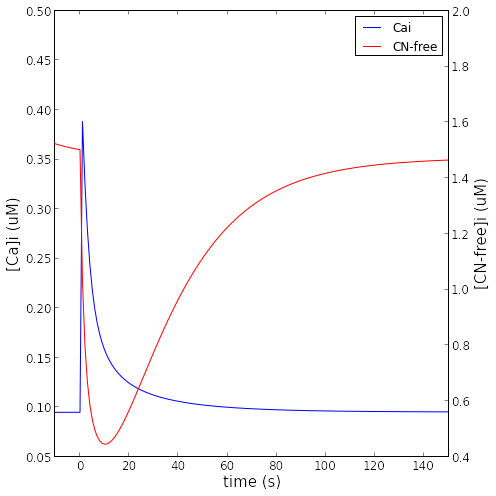

In [60]:
stateLabel1 = "Cai"
stateLabel2 = "CaMCN"
subData4 = ao.GetData(data3,stateLabel1)
subData5 = ao.GetData(data3,stateLabel2)

plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
ax2 = ax.twinx()
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

ln1 = ax.plot((subData4.t*1000-50),subData4.valsIdx,'b-',label="Cai")
ln2 = ax2.plot((subData5.t*1000-50),2-subData5.valsIdx,'r-',label="CN-free")

ax.set_xlabel("time (s)",fontsize=15)
ax.set_ylabel("[Ca]i (uM)",fontsize=15)
ax2.set_ylabel("[CN-free]i (uM)",fontsize=15)
ax.set_xlim(-10,150)
ax.set_ylim(0.05,0.5)
#ax2.set_ylim(-11,64)

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0,fontsize=12)
plt.tight_layout()

plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/CaMCNValid.png")

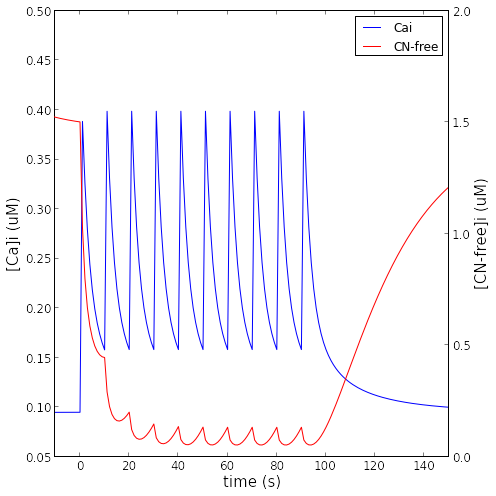

In [63]:
stateLabel1 = "Cai"
stateLabel2 = "CaMCN"
subData4 = ao.GetData(data4,stateLabel1)
subData5 = ao.GetData(data4,stateLabel2)

plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
ax2 = ax.twinx()
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

ln1 = ax.plot((subData4.t*1000-50),subData4.valsIdx,'b-',label="Cai")
ln2 = ax2.plot((subData5.t*1000-50),2-subData5.valsIdx,'r-',label="CN-free")

ax.set_xlabel("time (s)",fontsize=15)
ax.set_ylabel("[Ca]i (uM)",fontsize=15)
ax2.set_ylabel("[CN-free]i (uM)",fontsize=15)
ax.set_xlim(-10,150)
ax.set_ylim(0.05,0.5)
#ax2.set_ylim(-11,64)

lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0,fontsize=12)
plt.tight_layout()

plt.savefig("/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-paper/microglia04092018/CaMCNValid2.png")